# **Visualización**
# AE09. Seaborn Stripplot y Swarmplot

En este notebook veremos dos tipos de gráficas de `Seaborn` las cuales son excelentes alternativas para hacer gráficas categóricas utilizando puntos. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
sns.__version__ #Revisamos que estemos en la ultima versión de seaborn

'0.11.2'

In [2]:
# Importamos las librerías adicionales para el manejo numérico y de DataFrame
import numpy as np
import pandas as pd

In [3]:
sns.set(context='notebook',style='darkgrid',palette='dark')

En este caso, ahora en adelante todos los gráficos que utilicemos van a tener el formato que nosotros definimos con el método `sns.set()`

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
penguins_df = pd.read_csv("/content/drive/MyDrive/02_Analisis Exploratorio y Estadistica/Archivos/VD02.csv").dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


##<font color='blue'>Gráficas  stripplot</font>

El método `sns.stripplot` sitúa la variable categórica en el eje x y la variable cuantitativa en el eje y, mostrando con un punto cada uno de los valores. Para poder distinguir los puntos en el caso de que estén muy próximos, por defecto, se aplica un "temblor" (jitter) a los puntos para separarlos del eje vertical de forma aleatoria:

[Documentación stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot)


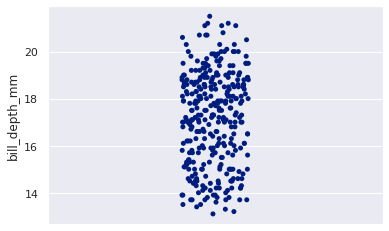

In [6]:
sns.stripplot(y ='bill_depth_mm', data=penguins_df)
plt.show()

ejemplo de un cambio en el parámetro `jitter`:

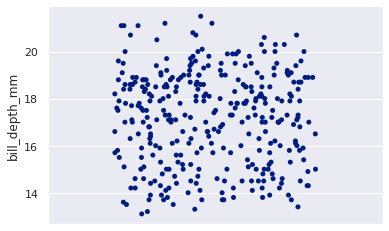

In [ ]:
sns.stripplot(y ='bill_depth_mm', data=penguins_df, jitter=0.3)
plt.show()

Podemos adicionar valores categóricos para realizar la separación de los puntos según categoría.

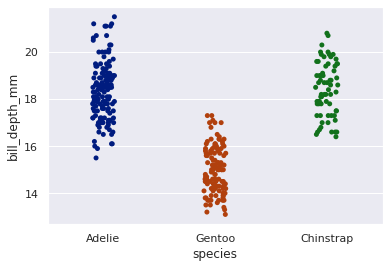

In [ ]:
sns.stripplot(x='species',y ='bill_depth_mm', data=penguins_df)
plt.show()

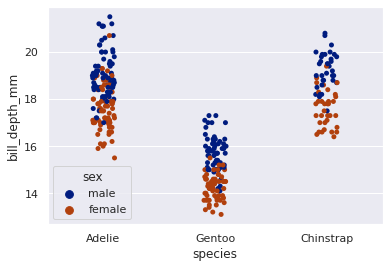

In [7]:
#se puede desagregar por categoria "sex" los datos
sns.stripplot(x='species',y ='bill_depth_mm', data=penguins_df, hue='sex')
plt.show()

##<font color='blue'>Gráficas  swarmplot</font>

El segundo método corresponde a swarmplot (Gráfico de enjambre). Para poder realizar este gráfico hay que utilizar el método `sns.swarmplot`, el cual genera gráficos semejantes a los generados por `sns.stripplot`, pero aplicando a la posición de los puntos cierto algoritmo de forma que no solapen. Esto ofrece una mejor visualización a costa de dejar de ser útil para conjuntos de datos muy grandes:

[Documentación Swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html?highlight=swarmplot#seaborn.swarmplot)


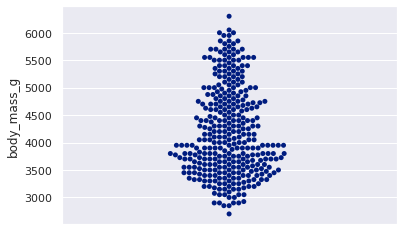

In [ ]:
sns.swarmplot(y ='body_mass_g', data=penguins_df)
plt.show()

Podemos adicionar valores categóricos para realizar la separación de los puntos según categoría. (de la misma forma que el stripplot)

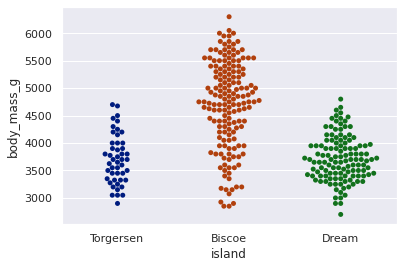

In [ ]:
sns.swarmplot(x='island',y ='body_mass_g', data=penguins_df)
plt.show()

Y recordar que también podemos pintar los puntos, dependiendo de alguna columna de nuestro interés

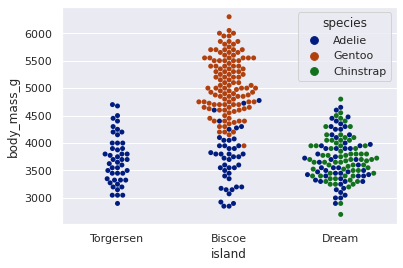

In [ ]:
sns.swarmplot(x='island',y ='body_mass_g', data=penguins_df,hue="species")
plt.show()

Se puede dibujar un diagrama de enjambre por sí solo, pero también es un buen complemento para un diagrama de caja o violín en los casos en los que desee mostrar todas las observaciones junto con alguna representación de la distribución subyacente. 

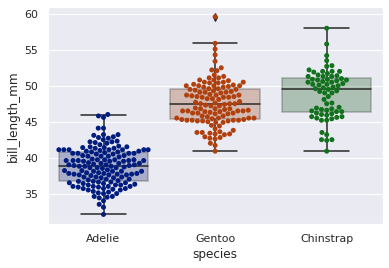

In [ ]:
# Para una mejor visualización le damos transparencia al boxplot, sin embargo, este método
# no tiene definido el parámetro 'alpha' en la API, pero si se puede lograr este efecto a 
# través de kwargs que se transmiten a matplotlib 
# Acá boxprop es un argumento de matplotlib
sns.boxplot(x='species',y='bill_length_mm', data=penguins_df, boxprops=dict(alpha=0.3))
sns.swarmplot(x='species',y='bill_length_mm', data=penguins_df)
plt.show()

## <font color='green'>Actividad 1:</font>

Para esta dinámica utilizaremos un set de datos de precios de diamantes (VD09.csv). La mayoría de las variables son auto explicativas a excepción de las variables `x`, `y`, `z`. Básicamente, estas variables hacen referencia al largo alto y ancho del diamante respectivamente. La idea es implementar la mayoría de los gráficos que hemos visto, con un par de diferencias:

1. Graficar la matriz de correlación para las distintas variables numéricas
2. Utilizando subplots genere 7 histogramas para las siguientes variables: carat, depth, table, price, x , y , z
3. Utilizando subplots genere 4 boxplots respetando las siguientes instrucciones:
    - Obtenga una muestra aleatoria del set de datos de los diamantes utilizando el método `diamonds_df.sample(100)`
    - Guarde esta muestra en una variable, utilícela para generar los gráficos
    - Genere los boxplots con una paleta de color pastel (puede que el parámetro `palette` puede ser de ayuda)
    - Para los dos primeros boxplots genere adicionalmente swarmplots para las mismas variables utilizadas que los boxplots (y el set de datos muestreado) **¿Surge algún warning de ejecución de codigo? ¿Que cree que pasaría si utilizara una muestra de 1000?**
    - Para los dos últimos boxplots, genere adicionalmente stripplots para las mismas variables utilizadas que los boxplots (y el set de datos muestreado) **¿Surge algún warning de ejecución de codigo?**
4. Utilizando subplots, genere 4 barplots
    - Cuente cuantos diamantes hay para cada corte (`cut`)
    - Cuente cuantos diamantes hay para cada color
    - Genere el gráfico de barras de precio promedio en relación con la claridad del diamante
    - Genere el gráfico de barras de precio acumulado total en relación a la claridad del diamante **¿Que función de numpy suma todos los elementos de un arreglo?**


In [ ]:
diamonds_df = pd.read_csv("/content/drive/MyDrive/02_Analisis Exploratorio y Estadistica/Archivos/VD09.csv").dropna()
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds_df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


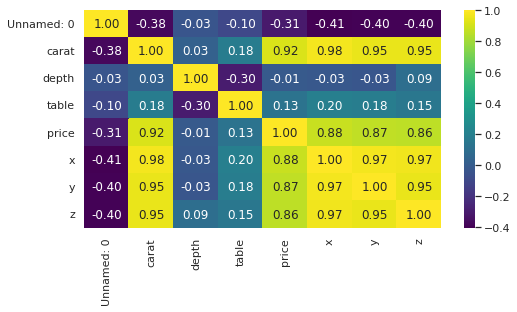

In [ ]:
#1. Graficar la matriz de correlación para las distintas variables numéricas

fig, ax = plt.subplots(figsize=(8,4), )

corr = diamonds_df.corr()

sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.show()


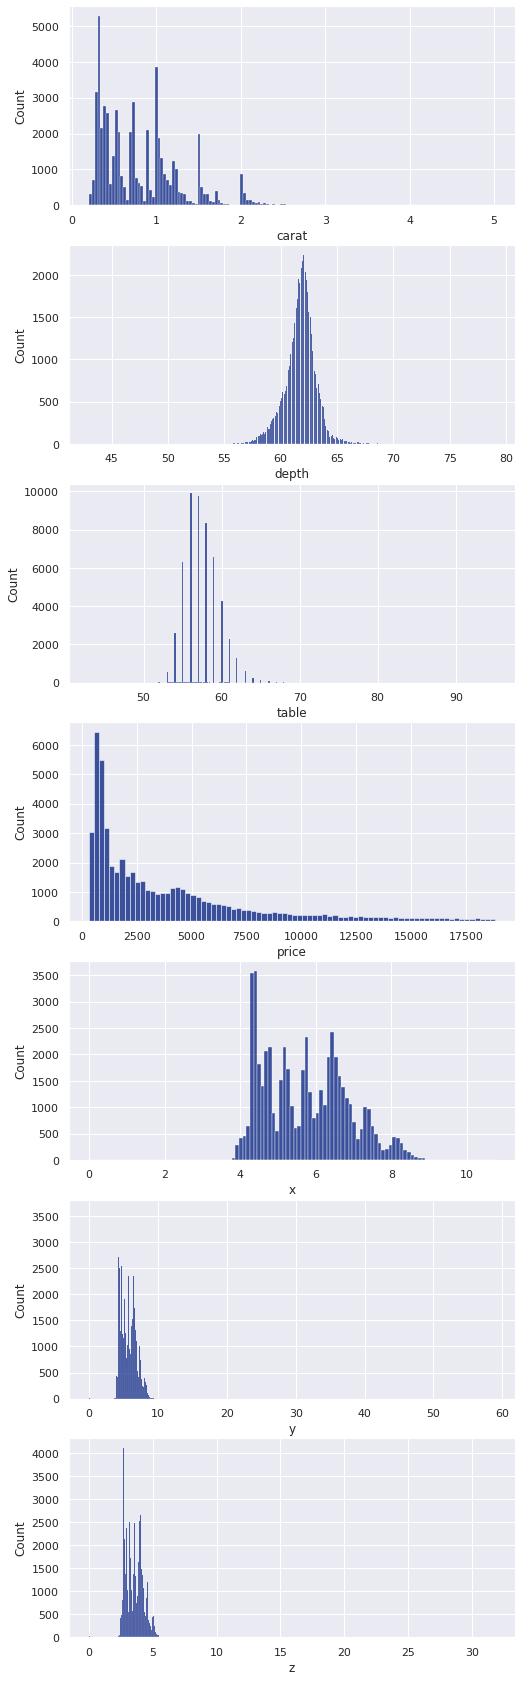

In [ ]:
# Utilizando subplots genere 7 histogramas para las siguientes variables: carat, depth, table, price, x , y , z

fig, ax = plt.subplots(7,1,figsize=(8,30))

sns.histplot(x='carat', data = diamonds_df, ax = ax[0])
sns.histplot(x='depth', data = diamonds_df, ax = ax[1])
sns.histplot(x='table', data = diamonds_df, ax = ax[2])
sns.histplot(x='price', data = diamonds_df, ax = ax[3])
sns.histplot(x='x', data = diamonds_df, ax = ax[4])
sns.histplot(x='y', data = diamonds_df, ax = ax[5])
sns.histplot(x='z', data = diamonds_df, ax = ax[6])

plt.show()

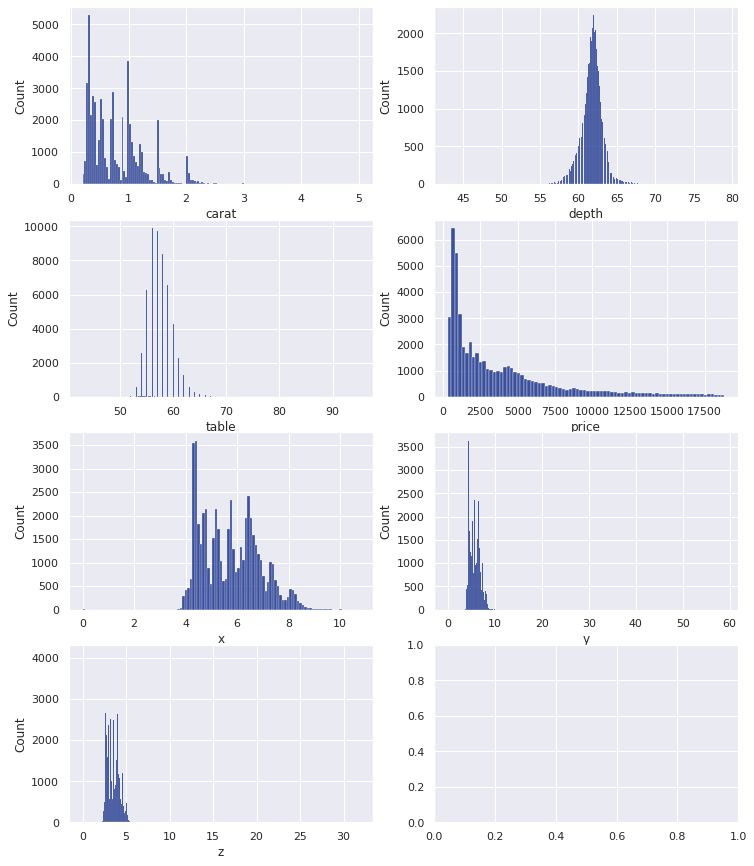

In [ ]:
# Alternativamente se grafican en dos columnas 
# Utilizando subplots genere 7 histogramas para las siguientes variables: carat, depth, table, price, x , y , z

fig, ax = plt.subplots(4,2,figsize=(12,15))

sns.histplot(x='carat', data = diamonds_df, ax = ax[0,0])
sns.histplot(x='depth', data = diamonds_df, ax = ax[0,1])
sns.histplot(x='table', data = diamonds_df, ax = ax[1,0])
sns.histplot(x='price', data = diamonds_df, ax = ax[1,1])
sns.histplot(x='x', data = diamonds_df, ax = ax[2,0])
sns.histplot(x='y', data = diamonds_df, ax = ax[2,1])
sns.histplot(x='z', data = diamonds_df, ax = ax[3,0])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


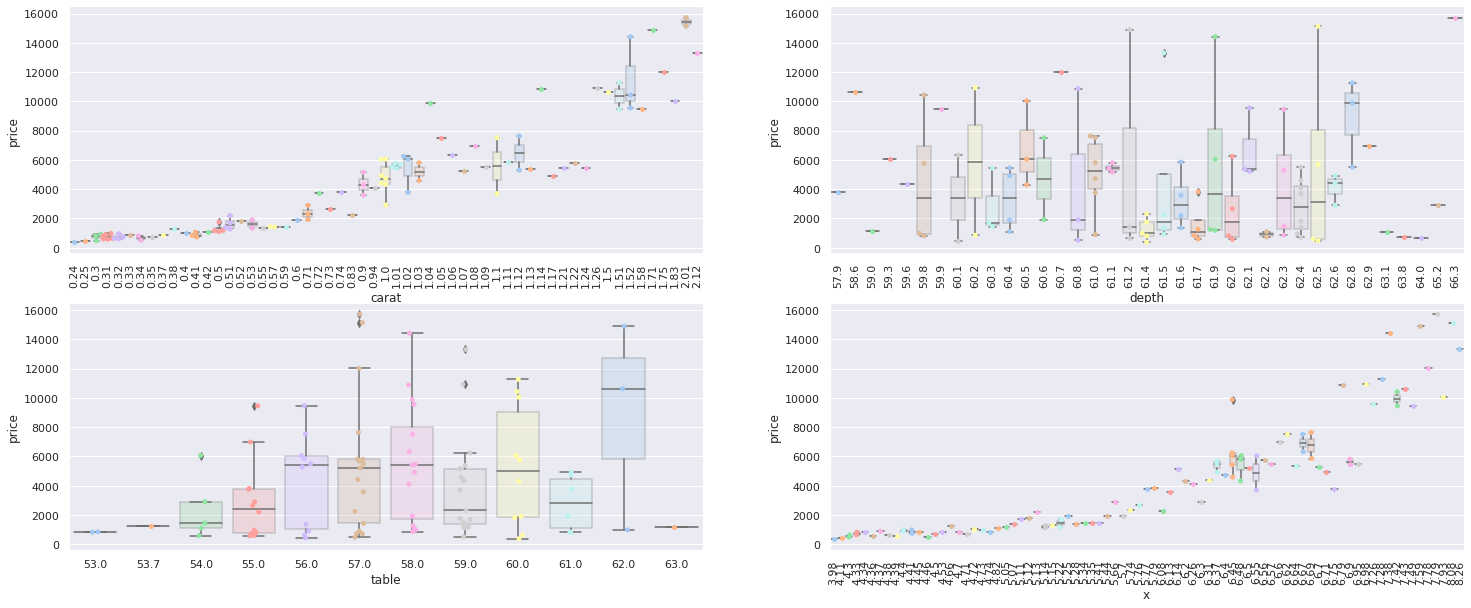

In [ ]:
# Utilizando subplots genere 4 boxplots respetando las siguientes instrucciones:
# Obtenga una muestra aleatoria del set de datos de los diamantes utilizando el método diamonds_df.sample(100)
# Guarde esta muestra en una variable, utilícela para generar los gráficos
# Genere los boxplots con una paleta de color pastel (puede que el parámetro palette puede ser de ayuda)
# Para los dos primeros boxplots genere adicionalmente swarmplots para las mismas variables utilizadas que los boxplots (y el set de datos muestreado) ¿Surge algún warning de ejecución de codigo? ¿Que cree que pasaría si utilizara una muestra de 1000?
# Para los dos últimos boxplots, genere adicionalmente stripplots para las mismas variables utilizadas que los boxplots (y el set de datos muestreado) ¿Surge algún warning de ejecución de codigo?

sample_diamonds_df = diamonds_df.sample(100)

fig, ax = plt.subplots(2,2,figsize=(25,10))

sns.boxplot(x='carat', y='price', data = sample_diamonds_df, palette='pastel', ax = ax[0,0], boxprops=dict(alpha=0.3))
sns.swarmplot(x='carat', y='price', data = sample_diamonds_df, palette='pastel', ax = ax[0,0])
ax[0,0].tick_params(axis='x', labelrotation=90 )

sns.boxplot(x='depth', y='price', data = sample_diamonds_df, palette='pastel', ax = ax[0,1], boxprops=dict(alpha=0.3))
sns.swarmplot(x='depth', y='price', data = sample_diamonds_df, palette='pastel', ax = ax[0,1])
ax[0,1].tick_params(axis='x', labelrotation=90 )

sns.boxplot(x='table', y='price', data = sample_diamonds_df, palette='pastel', ax = ax[1,0], boxprops=dict(alpha=0.3))
sns.stripplot(x='table', y='price', data = sample_diamonds_df, palette='pastel', ax = ax[1,0])

sns.boxplot(x='x', y='price', data = sample_diamonds_df, palette='pastel', ax = ax[1,1], boxprops=dict(alpha=0.3))
sns.stripplot(x='x', y='price', data = sample_diamonds_df, palette='pastel', ax = ax[1,1])
ax[1,1].tick_params(axis='x', labelrotation=90 )

plt.show()




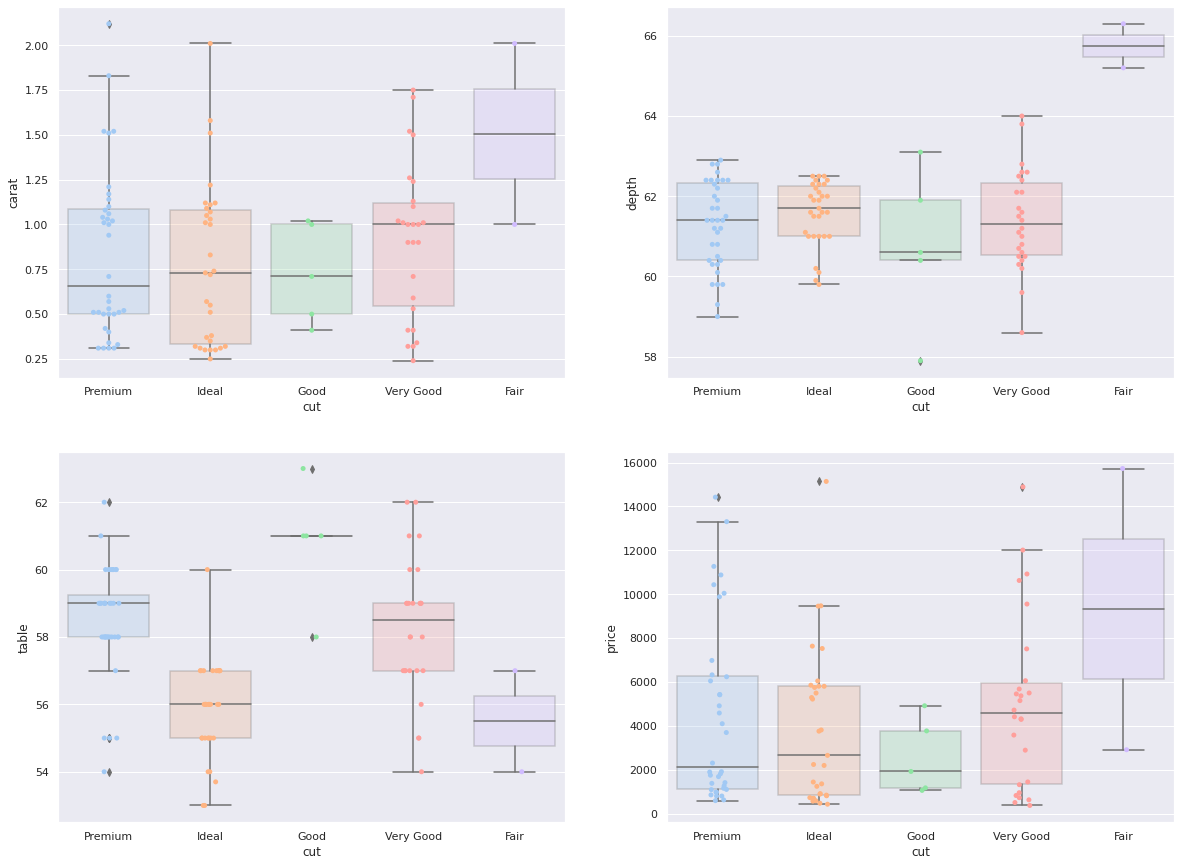

In [ ]:
#plotear versus variables categoricas

fig, ax = plt.subplots(2,2,figsize=(20,15))

sns.boxplot(x='cut', y='carat', data = sample_diamonds_df, palette='pastel', ax = ax[0,0], boxprops=dict(alpha=0.3))
sns.swarmplot(x='cut', y='carat', data = sample_diamonds_df, palette='pastel', ax = ax[0,0])

sns.boxplot(x='cut', y='depth', data = sample_diamonds_df, palette='pastel', ax = ax[0,1], boxprops=dict(alpha=0.3))
sns.swarmplot(x='cut', y='depth', data = sample_diamonds_df, palette='pastel', ax = ax[0,1])

sns.boxplot(x='cut', y='table', data = sample_diamonds_df, palette='pastel', ax = ax[1,0], boxprops=dict(alpha=0.3))
sns.stripplot(x='cut', y='table', data = sample_diamonds_df, palette='pastel', ax = ax[1,0])

sns.boxplot(x='cut', y='price', data = sample_diamonds_df, palette='pastel', ax = ax[1,1], boxprops=dict(alpha=0.3))
sns.stripplot(x='cut', y='price', data = sample_diamonds_df, palette='pastel', ax = ax[1,1])

plt.show()

In [ ]:
# Utilizando subplots, genere 4 barplots
# Cuente cuantos diamantes hay para cada corte (cut)
# Cuente cuantos diamantes hay para cada color
# Genere el gráfico de barras de precio promedio en relación con la claridad del diamante
# Genere el gráfico de barras de precio acumulado total en relación a la claridad del diamante ¿Que función de numpy suma todos los elementos de un arreglo?

cut_class = diamonds_df.cut.unique()
# print(cut_class[0])
count_cut_class = np.zeros(len(cut_class))
for i in range(0,len(cut_class)):
  #print(sum(diamonds_df.cut == cut_class[i]))
  count_cut_class[i] = sum(diamonds_df.cut == cut_class[i])
  print(f'Existen {count_cut_class[i]} diamantes con corte {cut_class[i]}')

print(10*'-')

color_class = diamonds_df.color.unique()
# print(cut_class[0])
count_color_class = np.zeros(len(color_class))
for i in range(0,len(color_class)):
  #print(sum(diamonds_df.cut == cut_class[i]))
  count_color_class[i] = sum(diamonds_df.color == color_class[i])
  print(f'Existen {count_color_class[i]} diamantes con color {color_class[i]}')

print(10*'-')


Existen 21551.0 diamantes con corte Ideal
Existen 13791.0 diamantes con corte Premium
Existen 4906.0 diamantes con corte Good
Existen 12082.0 diamantes con corte Very Good
Existen 1610.0 diamantes con corte Fair
----------
Existen 9797.0 diamantes con color E
Existen 5422.0 diamantes con color I
Existen 2808.0 diamantes con color J
Existen 8304.0 diamantes con color H
Existen 9542.0 diamantes con color F
Existen 11292.0 diamantes con color G
Existen 6775.0 diamantes con color D


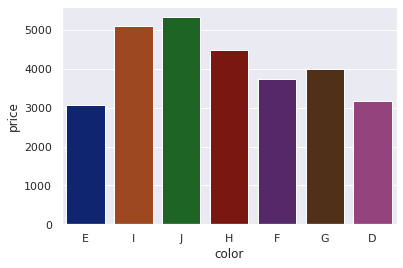

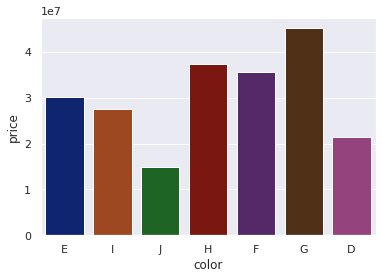

In [ ]:
# Genere el gráfico de barras de precio promedio en relación con la claridad del diamante
# Genere el gráfico de barras de precio acumulado total en relación a la claridad del diamante ¿Que función de numpy suma todos los elementos de un arreglo?

sns.barplot(x='color', y ='price', ci=None, estimator=pd.Series.mean, data=diamonds_df) #
plt.show()

# sns.barplot(x='color', y ='price', ci=None, estimator=pd.Series.count, data=diamonds_df) #
sns.barplot(x='color', y ='price', ci=None, estimator=pd.Series.sum, data=diamonds_df) #
plt.show()

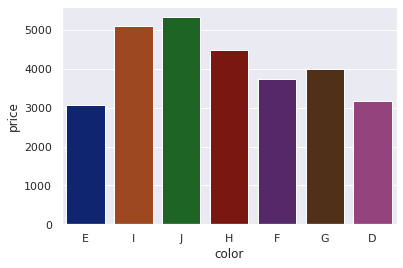

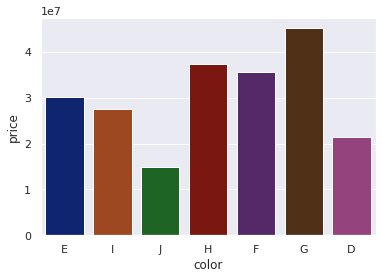

In [ ]:
# Utilizando funciones de numpy

sns.barplot(x='color', y ='price', ci=None, estimator=np.mean, data=diamonds_df) #
plt.show()

sns.barplot(x='color', y ='price', ci=None, estimator=np.sum, data=diamonds_df) #
plt.show()

<font color='green'>Fin actividad 1</font>